<a href="https://colab.research.google.com/github/Piyumi22/Optimization-labs/blob/optimizing/E_17_259_LAB_05_EM502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All the answers are included in this colab file itself for lab 05

In [44]:
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.lines as mlines
import numpy as np
from scipy import optimize as opt

# **Optimality conditions for constrained nonlinear optimization problems(CNOP) and KKT conditions.**
#**Consider the following nonlinear constrained optimization problem.**

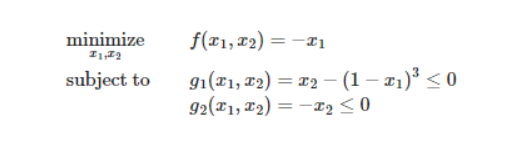

##1.a) **Using the helper functions provided determine if this problem admits Lagrange multipliers.** b) **Can you write the gradient of the objective function as a linear combination of the gradients of the constraints?Why?**

In [45]:
# Define the Lagrangian and its gradient
import sympy as sym
from sympy import pprint, latex, root
from IPython.display import display, Latex

x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
m1 = sym.Symbol(r"\mu_1")
m2 = sym.Symbol(r"\mu_2")
f = -x1
g1 = x2 - (1-x1)**3
g2 = -x2
L = f + m1*g1 + m2*g2
display(Latex(r"$L=$"),L)
# print(latex(L))

dL = sym.Matrix([[sym.diff(L,x1)],[sym.diff(L,x2)]])
display(Latex(r"$\nabla L=$"),dL)
# print(latex(dL))

kkt = (sym.diff(L,x1), sym.diff(L,x2), m1*g1, m2*g2)
sol = sym.solve(kkt,(x1,x2,m1,m2), dict=True)
display(sol)

<IPython.core.display.Latex object>

\mu_1*(x_2 - (1 - x_1)**3) - \mu_2*x_2 - x_1

<IPython.core.display.Latex object>

Matrix([
[3*\mu_1*(1 - x_1)**2 - 1],
[           \mu_1 - \mu_2]])

[]

In [46]:
#The gradients of the constraints
dg = sym.Matrix([[sym.diff(g1,x1),sym.diff(g1,x2)],[sym.diff(g2,x1),sym.diff(g2,x2)]])
display(Latex(r"$\nabla \mathbf{g}=$"),dg)
# print(latex(dg))
display(Latex(r"$\nabla \mathbf{g}(1,0)=$"),dg.subs({x1:1,x2:0}))
# print(latex(dg.subs({x1:1,x2:0})))
display(Latex(r"$\mathrm{rank}(\nabla \mathbf{g}(1,0))=$"),dg.subs({x1:1,x2:0}).rank())

<IPython.core.display.Latex object>

Matrix([
[3*(1 - x_1)**2,  1],
[             0, -1]])

<IPython.core.display.Latex object>

Matrix([
[0,  1],
[0, -1]])

<IPython.core.display.Latex object>

1

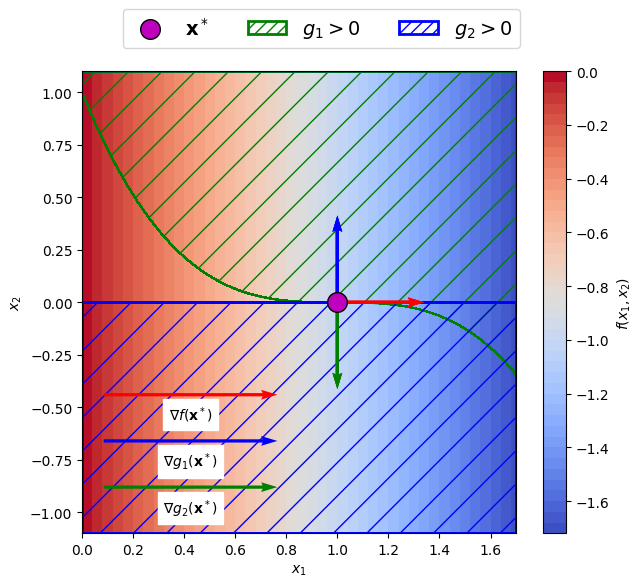

In [47]:
# Visualize the constraints and the objective functions
def constraint_color(cf,color):
    # https://github.com/matplotlib/matplotlib/issues/2789/#issuecomment-604599060
    for i, collection in enumerate(cf.collections):
        collection.set_edgecolor(color)

# optimizer
x_opt = [1., 0.]

# Objective
X1,X2 = np.meshgrid(np.linspace(0,1.7,40),np.linspace(-1.1,1.1,40))
F = -X1
handles = []; labels = []

origin = np.array([x_opt]*3).T # origin point
vectors = np.array([[1,0],[0,1],[0,-1]])

# initialize figure
fig, ax = plt.subplots(figsize=(7,6))
cf = ax.contourf(X1, X2, F,cmap="coolwarm",levels=50,zorder=-1)
opt = ax.scatter([x_opt[0],], [x_opt[1],], s = 200, marker="o", color="m", edgecolors="k", linestyle="None",label="$\mathbf{x}^*$",zorder=3)
Q = ax.quiver(*origin, vectors[0:1,0], vectors[0:1,1], color=['r',], scale=5, zorder=2)
qk = ax.quiverkey(Q, 0.25, 0.3, 2, r"$\nabla f(\mathbf{x}^*)$", labelpos='S', coordinates='axes')
qk.text.set_backgroundcolor('w')
Q = ax.quiver(*origin, vectors[1:2,0], vectors[1:2,1], color=['b'], scale=5, zorder=2)
qk=ax.quiverkey(Q, 0.25, 0.2, 2, r"$\nabla g_1(\mathbf{x}^*)$", labelpos='S', coordinates='axes')
qk.text.set_backgroundcolor('w')
Q = ax.quiver(*origin, vectors[2:3,0], vectors[2:3,1], color=['g'], scale=5, zorder=2)
qk=ax.quiverkey(Q, 0.25, 0.1, 2, r"$\nabla g_2(\mathbf{x}^*)$", labelpos='S', coordinates='axes')
qk.text.set_backgroundcolor('w')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
fig.colorbar(cf, ax=ax, orientation='vertical', label=r"$f(x_1,x_2)$")
handles += [opt]
labels += [r"$\mathbf{x}^*$"]
# Constraints
G1 = X2 - (1-X1)**3
cf = plt.contourf(X1, X2, G1, levels=[-200, 0, 200], colors='none',hatches=[None, '/'],extend='lower')
constraint_color(cf,'g')
a_hatch = patches.Rectangle((20,20), 20, 20, linewidth=2, edgecolor='g', facecolor='none', fill='None', hatch='///')
handles += [a_hatch]
labels += [r"$g_1>0$"]

G2 = -X2
cf = plt.contourf(X1, X2, G2, levels=[-200, 0, 200], colors='none',hatches=[None, '/'],extend='lower')
constraint_color(cf,'b')
a_hatch = patches.Rectangle((20,20), 20, 20, linewidth=2, edgecolor='b', facecolor='none', fill='None', hatch='///')
handles += [a_hatch]
labels += [r"$g_2>0$"]

lx = fig.legend(handles, labels, loc='upper center', ncol=3, fontsize = 14)
# fig.savefig("irregular_point.pdf",bbox_inches="tight")

plt.show()

###ANSWERS

a) The problem does not admit Lagrange multipliers because the gradients of the constraint functions are linearly dependent. This can be observed from the fact that the rank of the gradient matrix of constraints is not equal to 2; instead, it is equal to 1.

b) No. According to the plot, we can see both gradients are perpendicular to the gradient of the objective function. Hence, the gradient of the objective function cannot be written as a linear combination of the gradients of the constraints.

##1.2 **Determine the kkt points for the following CNOP.Check if they give local minimum points.**

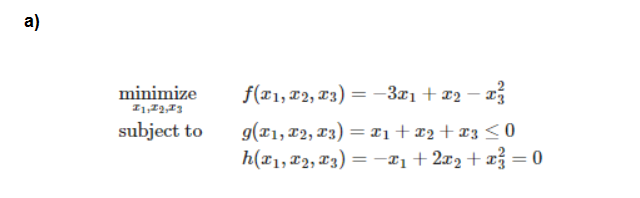

In [48]:
#a)
x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
x3 = sym.Symbol("x_3")
m = sym.Symbol(r"\mu")
l = sym.Symbol(r"\lambda")
f = -3*x1 + x2 - x3**2
g = x1 + x2 + x3
h = -x1 + 2*x2 + x3**2
L = f + m*g + l*h
display(Latex(r"$L=$"),L)
# print(latex(L))

dL = sym.Matrix([[sym.diff(L,x1)],[sym.diff(L,x2)],[sym.diff(L,x3)]])
display(Latex(r"$\nabla L=$"),dL)
# print(latex(dL))

dL2 = sym.Matrix([
        [sym.diff(dL[0],x1),sym.diff(dL[0],x2),sym.diff(dL[0],x3)],
        [sym.diff(dL[1],x1),sym.diff(dL[1],x2),sym.diff(dL[1],x3)],
        [sym.diff(dL[2],x1),sym.diff(dL[2],x2),sym.diff(dL[2],x3)],
    ])
display(Latex(r"$\nabla^2 L=$"),dL2)
# print(latex(dL2))

kkt = (sym.diff(L,x1), sym.diff(L,x2), sym.diff(L,x3), m*g, l*h)
sol = sym.solve(kkt,(x1,x2,x3,m,l))
display(Latex("$"+latex(sol[0])+"$"))

<IPython.core.display.Latex object>

\lambda*(-x_1 + 2*x_2 + x_3**2) + \mu*(x_1 + x_2 + x_3) - 3*x_1 + x_2 - x_3**2

<IPython.core.display.Latex object>

Matrix([
[         -\lambda + \mu - 3],
[        2*\lambda + \mu + 1],
[2*\lambda*x_3 + \mu - 2*x_3]])

<IPython.core.display.Latex object>

Matrix([
[0, 0,             0],
[0, 0,             0],
[0, 0, 2*\lambda - 2]])

<IPython.core.display.Latex object>

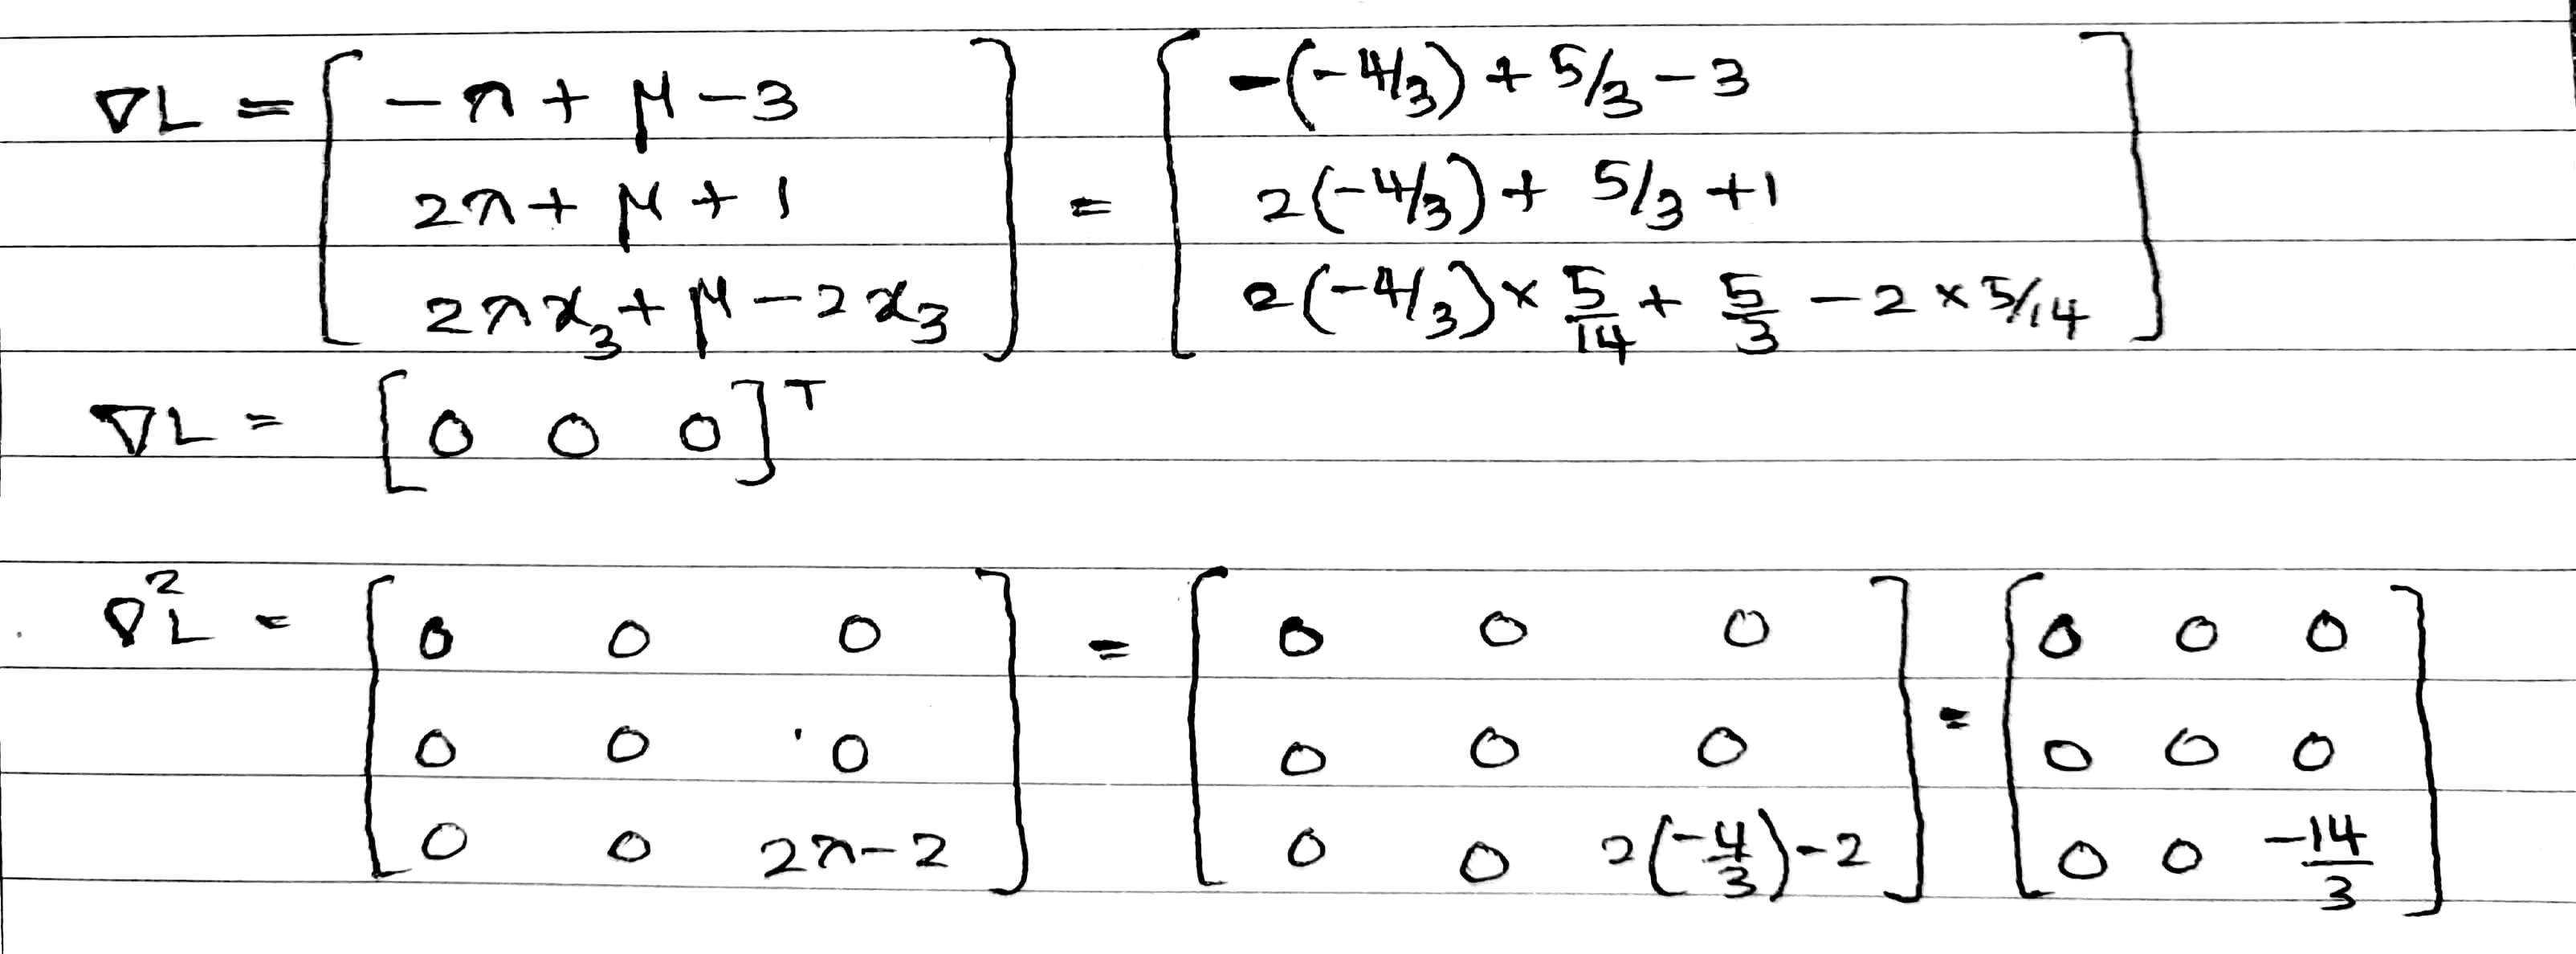

* By substituting KKT point, we can see that the
gradient (∇L) becomes 0.

* However, ∇^2 L has eigen values 0,0 and (-14/3). All eigen values are not positive. Therefore, this point is not a local minimum.  

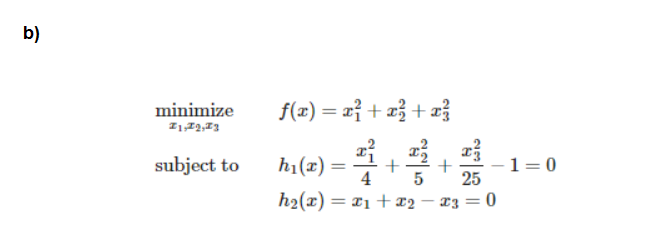

In [49]:
#b)

x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
x3 = sym.Symbol("x_3")
l1 = sym.Symbol(r"\lambda_1")
l2 = sym.Symbol(r"\lambda_2")

f = x1**2 + x2**2 + x3**2
h1 = (x1**2)/4 + (x2**2)/5 + (x3**2)/25 - 1
h2 = x1 + x2 - x3
L = f + l1*h1 + l2*h2
display(Latex(r"$L=$"),L)
# print(latex(L))

dL = sym.Matrix([[sym.diff(L,x1)],[sym.diff(L,x2)],[sym.diff(L,x3)]])
display(Latex(r"$\nabla L=$"),dL)
# print(latex(dL))

dL2 = sym.Matrix([
        [sym.diff(dL[0],x1),sym.diff(dL[0],x2),sym.diff(dL[0],x3)],
        [sym.diff(dL[1],x1),sym.diff(dL[1],x2),sym.diff(dL[1],x3)],
        [sym.diff(dL[2],x1),sym.diff(dL[2],x2),sym.diff(dL[2],x3)],
    ])
display(Latex(r"$\nabla^2 L=$"),dL2)
# print(latex(dL2))

kkt = (sym.diff(L,x1), sym.diff(L,x2), sym.diff(L,x3), l1*h1, l2*h2)
sol = sym.solve(kkt,(x1,x2,x3,l1,l2))
for i,s in enumerate(sol):
    print("===================================")
    print("Solution %i:"%(i+1))
    display(Latex("$"+latex(s)+"$"))
    # print(latex(sym.simplify(s)))
    x_sol = [i.evalf() for i in s]
    print("x_sol =",x_sol)
    f_sol = f.subs({x1:x_sol[0], x2:x_sol[1], x3:x_sol[2]})
    print("f =", f_sol)

    if any([m < 0 for m in []]):
        print("INVALID MULTIPLIERS")
    elif any([l == 0 for l in [s[3]]]):
        print("INVALID MULTIPLIERS")

<IPython.core.display.Latex object>

\lambda_1*(x_1**2/4 + x_2**2/5 + x_3**2/25 - 1) + \lambda_2*(x_1 + x_2 - x_3) + x_1**2 + x_2**2 + x_3**2

<IPython.core.display.Latex object>

Matrix([
[   \lambda_1*x_1/2 + \lambda_2 + 2*x_1],
[ 2*\lambda_1*x_2/5 + \lambda_2 + 2*x_2],
[2*\lambda_1*x_3/25 - \lambda_2 + 2*x_3]])

<IPython.core.display.Latex object>

Matrix([
[\lambda_1/2 + 2,                 0,                  0],
[              0, 2*\lambda_1/5 + 2,                  0],
[              0,                 0, 2*\lambda_1/25 + 2]])

Solution 1:


<IPython.core.display.Latex object>

x_sol = [0, 0, -5.00000000000000, -25.0000000000000, 0]
f = 25.0000000000000
Solution 2:


<IPython.core.display.Latex object>

x_sol = [0, 0, 5.00000000000000, -25.0000000000000, 0]
f = 25.0000000000000
Solution 3:


<IPython.core.display.Latex object>

x_sol = [-1.02597835208515, -1.53896752812773, -2.56494588021289, -10.0000000000000, -3.07793505625546]
f = 10.0000000000000
Solution 4:


<IPython.core.display.Latex object>

x_sol = [1.02597835208515, 1.53896752812773, 2.56494588021289, -10.0000000000000, 3.07793505625546]
f = 10.0000000000000
Solution 5:


<IPython.core.display.Latex object>

x_sol = [0, -2.23606797749979, 0, -5.00000000000000, 0]
f = 5.00000000000000
Solution 6:


<IPython.core.display.Latex object>

x_sol = [0, 2.23606797749979, 0, -5.00000000000000, 0]
f = 5.00000000000000
Solution 7:


<IPython.core.display.Latex object>

x_sol = [-1.57377895072927, 1.37705658188811, -0.196722368841158, -4.41176470588235, -0.324013313385437]
f = 4.41176470588235
Solution 8:


<IPython.core.display.Latex object>

x_sol = [1.57377895072927, -1.37705658188811, 0.196722368841158, -4.41176470588235, 0.324013313385437]
f = 4.41176470588235
Solution 9:


<IPython.core.display.Latex object>

x_sol = [-2.00000000000000, 0, 0, -4.00000000000000, 0]
f = 4.00000000000000
Solution 10:


<IPython.core.display.Latex object>

x_sol = [2.00000000000000, 0, 0, -4.00000000000000, 0]
f = 4.00000000000000
Solution 11:


<IPython.core.display.Latex object>

x_sol = [0, 0, 0, 0, 0]
f = 0
INVALID MULTIPLIERS




**Solution 1**

∇L = 0

∇^2L gives eigenvalues of 0, 0.4, 1.68 which implies the ∇^2L is positive simi definite

Since it has zero eigenvalue, it can not be concluded as a local minimum point.


**Solution 2**

∇L = 0

∇^2L gives eigenvalues of -10.5, -8, 0 which implies the ∇^2L is negative simi definite

Since it has zero and negative eigenvalues, it can not be concluded as a local minimum point.

**Solution 3**

It gives Invalid multiplies

**Solution 4**

∇L = 0

∇^2L gives eigenvalues of -10.5, -8, 0 which implies the ∇^2L is negative simi definite

Since it has zero and negative eigenvalues, it can not be concluded as a local minimum point.

**Solution 5**

∇L = 0

∇^2L gives eigenvalues of -0.5, 0, 1.6 which implies the ∇^2L is not positive definite

Since, it has zero and negative eigenvalues, it can not be concluded as a local minimum point.

**Solution 6**

∇L = 0

∇^2L gives eigenvalues of -0.5, 0, 1.6 which implies the ∇^2L is not positive definite

Since, it has zero and negative eigenvalues, it can not be concluded as a local minimum point.

**Solution 7**

∇L = 0

∇^2L gives eigenvalues of 0, 0.4, 1.68 which implies the ∇^2L is positive semi definite

Since, it has a zero eigenvalue, it can not be concluded as a local minimum point.

**Solution 8**

∇L = 0

∇^2L gives eigenvalues of -0.20588, 0.2353, 1.6470 which implies the ∇^2L is not positive definite

Since, it has a negative eigenvalue, it can not be concluded as a local minimum point.

**Solution 9**

∇L = 0

∇^2L gives eigenvalues of -0.20588, 0.2353, 1.6470 which implies the ∇^2L is not positive definite

Since, it has a negative eigenvalue, it can not be concluded as a local minimum point.

**Solution 10**

∇L = 0
∇^2L gives eigenvalues of -3, -2, 1.2 which implies the ∇^2L is not positive definite

Since it has negative eigenvalues, it can not be concluded as a local minimum point.

**Solution 11**

∇L = 0

∇^2L gives eigenvalues of -3, -2, 1.2 which implies the ∇^2L is not positive definite

Since it has negative eigenvalues, it can not be concluded as a local minimum point.

# **Activity 1**

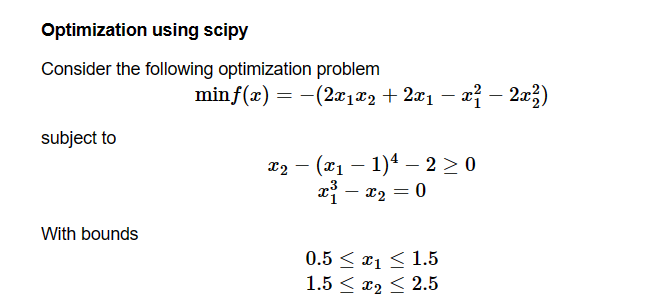

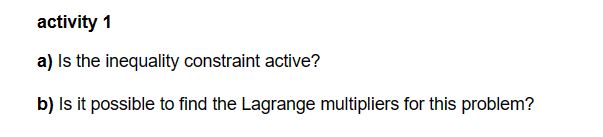

In [50]:
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.lines as mlines
import numpy as np
from scipy import optimize as opt

In [51]:
#objective function
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

[0, 3, 0, 3]

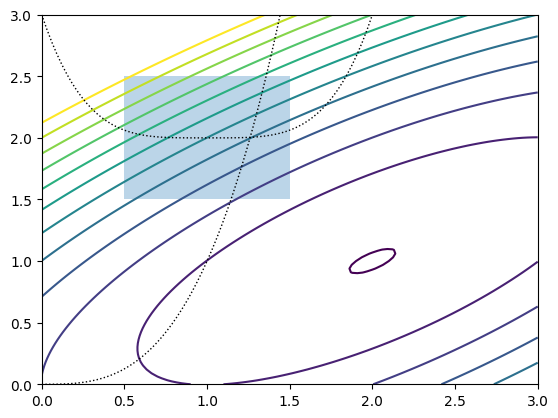

In [52]:
#contours of the objective function and the constraints
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1));
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3])
[0, 3, 0, 3]

In [53]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - (x[0]-1)**4 - 2])})

bnds = ((0.5, 1.5), (1.5, 2.5))

In [54]:
x0 = [3, 4]

In [55]:
ux = opt.minimize(f, x0, constraints=None)
ux

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.9999999999999392
        x: [ 2.000e+00  1.000e+00]
      nit: 6
      jac: [-2.086e-07 -1.788e-07]
 hess_inv: [[ 9.895e-01  4.933e-01]
            [ 4.933e-01  4.957e-01]]
     nfev: 21
     njev: 7

In [56]:
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons)
cx

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.0499154720914454
       x: [ 1.261e+00  2.005e+00]
     nit: 4
     jac: [-3.487e+00  5.497e+00]
    nfev: 13
    njev: 4

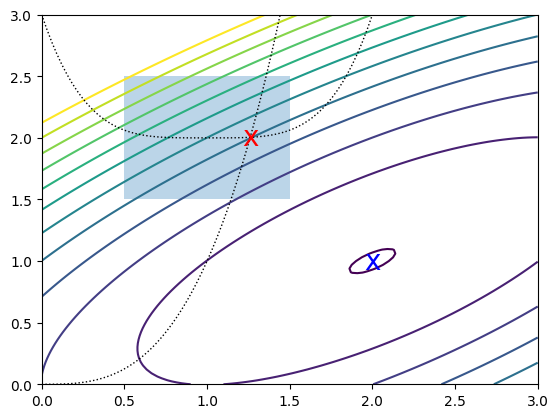

In [57]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1));
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.text(ux['x'][0], ux['x'][1], 'x', va='center', ha='center', size=20, color='blue')
plt.text(cx['x'][0], cx['x'][1], 'x', va='center', ha='center', size=20, color='red')
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3]);

a)

*   The unconstrained optimal point is located at (2,1)

*   However, the constrained optimal point is found at coordinates (1.261, 2.005).
*   This indicates that the constraints have influenced the optimal point in such a manner that it satisfies the inequality constraint.
*   Therefore, inequality constraint is active.






b) Is it possible to find the Lagrange multipliers for this problem?

- Lets use the previously used code segment to find this.

In [58]:
# Define the Lagrangian and its gradient
import sympy as sym
from sympy import pprint, latex, root
from IPython.display import display, Latex

x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")
m = sym.Symbol(r"\mu_")
l = sym.Symbol(r"\lambda_")
f = -(2*x1*x2 + 2*x1 - x1**2 - 2*x2**2)
g = x2 - (x1-1)**4 -2
h = x1**3 -x2
L = f + l*h + m*g
display(Latex(r"$L=$"),L)
# print(latex(L))

dL = sym.Matrix([[sym.diff(L,x1)],[sym.diff(L,x2)]])
display(Latex(r"$\nabla L=$"),dL)
# print(latex(dL))

#kkt = (sym.diff(L,x1), sym.diff(L,x2), l*h, m*g)
#sol = sym.solve(kkt,(x1,x2,l,h), dict=True)
#display(sol)

<IPython.core.display.Latex object>

\lambda_*(x_1**3 - x_2) + \mu_*(x_2 - (x_1 - 1)**4 - 2) + x_1**2 - 2*x_1*x_2 - 2*x_1 + 2*x_2**2

<IPython.core.display.Latex object>

Matrix([
[3*\lambda_*x_1**2 - 4*\mu_*(x_1 - 1)**3 + 2*x_1 - 2*x_2 - 2],
[                           -\lambda_ + \mu_ - 2*x_1 + 4*x_2]])

In [59]:
#The gradients of the constraints
dg = sym.Matrix([[sym.diff(g,x1)],[sym.diff(g,x2)]])
display(Latex(r"$\nabla \mathbf{g}=$"),dg)
# print(latex(dg))
display(Latex(r"$\nabla \mathbf{g}(1.261,2.005)=$"),dg.subs({x1:1.261,x2:2.005}))
# print(latex(dg.subs({x1:1,x2:0})))
#display(Latex(r"$\mathrm{rank}(\nabla \mathbf{g}(1,0))=$"),dg.subs({x1:1,x2:0}).rank())

dh = sym.Matrix([[sym.diff(h,x1)],[sym.diff(h,x2)]])
display(Latex(r"$\nabla \mathbf{h}=$"),dh)
# print(latex(dg))
display(Latex(r"$\nabla \mathbf{h}(1.261,2.005)=$"),dh.subs({x1:1.261,x2:2.005}))

print("∇h.∇g = ", np.dot(dh.subs({x1:1.261,x2:2.005}).T,dg.subs({x1:1.261,x2:2.005})))

<IPython.core.display.Latex object>

Matrix([
[-4*(x_1 - 1)**3],
[              1]])

<IPython.core.display.Latex object>

Matrix([
[-0.0711183239999999],
[                  1]])

<IPython.core.display.Latex object>

Matrix([
[3*x_1**2],
[      -1]])

<IPython.core.display.Latex object>

Matrix([
[4.770363],
[      -1]])

∇h.∇g =  [[-1.33926022143161]]


* we can find (∇h.∇g) which is not equal to 0, meaning they are not independent to each other.

* Therefore (1.261,2.005) is not a regular point.

* Hence, it is not possible to find Lagrange multipliers for the point (1.261,2.005) for this problem.

# **Activity 2**

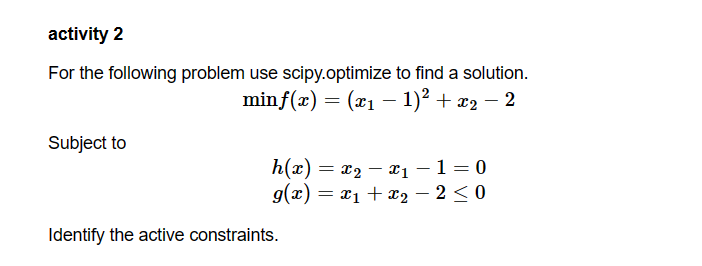

In [60]:
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.lines as mlines
import numpy as np
from scipy import optimize as opt

In [61]:
#objective function
def f(x):
    return (x[0]-1)**2 + x[1] - 2


(-2.0, 3.0, -3.0, 3.0)

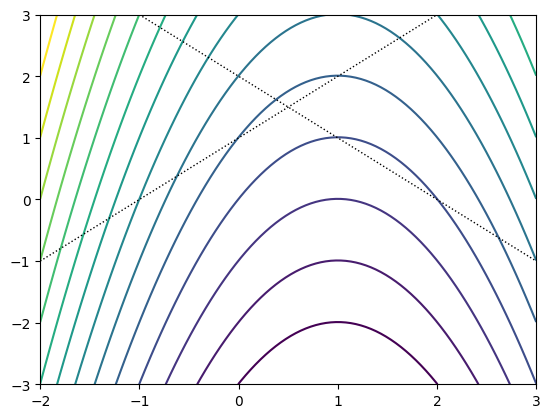

In [62]:
#contours of the objective function and the constraints
x = np.linspace(-2, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-3.99,10, 1));
plt.plot(x, x + 1, 'k:', linewidth=1)
plt.plot(x, 2 - x, 'k:', linewidth=1)
plt.axis([-2,3,-3,3])

In [63]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([-x[0] + x[1] -1]),
         'jac' : lambda x: np.array([-1.0, 1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[0] + x[1] - 2])})


In [64]:
x0 = [0,0]

In [65]:
ux =opt.minimize(f, x0, constraints=None)
ux

  message: Maximum number of iterations has been exceeded.
  success: False
   status: 1
      fun: -3.3447872900451435e+101
        x: [ 5.783e+50 -6.690e+101]
      nit: 400
      jac: [ 1.157e+51  1.000e+00]
 hess_inv: [[ 5.000e-01 -1.013e+51]
            [-1.013e+51  2.344e+102]]
     nfev: 1215
     njev: 405

In [66]:
cx = opt.minimize(f, x0, constraints=cons)
cx

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.2500000000000002
       x: [ 5.000e-01  1.500e+00]
     nit: 2
     jac: [-1.000e+00  1.000e+00]
    nfev: 6
    njev: 2

(-2.0, 3.0, -3.0, 3.0)

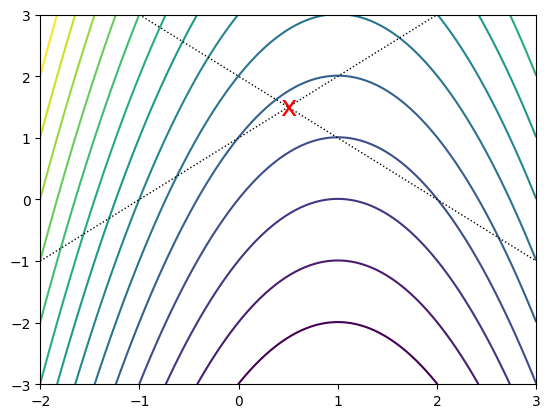

In [67]:
x = np.linspace(-2, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-3.99,10, 1));
plt.plot(x, x + 1, 'k:', linewidth=1)
plt.plot(x, 2 - x, 'k:', linewidth=1)
plt.text(ux['x'][0], ux['x'][1], 'x', va='center', ha='center', size=20, color='blue')
plt.text(cx['x'][0], cx['x'][1], 'x', va='center', ha='center', size=20, color='red')
plt.axis([-2,3,-3,3])

The solution from scipy.optimize is [0.5,1.5].

Substituting the solution in constraints h(x) and g(x);

h(0.5,1.5) = 0

g(0.5,1.5) = 0

Hence, it satisies both constriants and it lies on boundaries of them.

Therefore, both equality and inequality constraints are active.